# Kyphosis Dataset Analysis

## Data Loading & Exploration

*   **Inputs:** Kyphosis (absent or present), Age (in months), Number (the number of vertebrae involved), Start (the number of the first vertebra operated on)
*   **Outputs:** Link to the dataset (https://www.kaggle.com/datasets/abbasit/kyphosis-dataset)

### Import Libraries

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
# 1. Age: in months, 2. Number: the number of vertebrae involved, 3. Start: the number of the first (topmost) vertebra operated on.
k_df = pd.read_csv('kyphosis[1].csv')
k_df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [ ]:
k_df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [ ]:
k_df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [ ]:
k_df.shape

(81, 4)

In [ ]:
k_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [ ]:
k_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [ ]:
k_df.isnull().sum()

,0
Kyphosis,0
Age,0
Number,0
Start,0


## Data Preprocessing

### Normalization Used to Convert Feature Range From 0-1

---



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
k_df['Age'] = scaler.fit_transform(k_df['Age'].values.reshape(-1,1))
k_df

,Kyphosis,Age,Number,Start
0,absent,0.341463,3,5
1,absent,0.765854,3,14
2,present,0.619512,4,5
3,absent,0.004878,5,1
4,absent,0.000000,4,15
...,...,...,...,...
76,present,0.760976,3,13
77,absent,0.121951,7,13
78,absent,0.580488,2,13
79,present,0.200000,7,6


### Converting The Age From Months to Years

---

In [ ]:
k_df['Age'].mean()/12

np.float64(0.03359931747465623)

In [ ]:
k_df['Age'].min()/12

In [ ]:
k_df['Age'].max()/12

In [ ]:
k_df["Age"] = k_df["Age"].astype("float64")
k_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Kyphosis  81 non-null     object 
 1   Age       81 non-null     float64
 2   Number    81 non-null     int64  
 3   Start     81 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 2.7+ KB


### Creating a Function to Convert Age From Months to Years

---

In [ ]:
# defining a function to change age from months to years
def month_to_year(age):
  return age / 12

In [ ]:
# applying the function to the ['Age'] column
k_df['Age'] = k_df['Age'].apply(month_to_year)
k_df

,Kyphosis,Age,Number,Start
0,absent,0.028455,3,5
1,absent,0.063821,3,14
2,present,0.051626,4,5
3,absent,0.000407,5,1
4,absent,0.000000,4,15
...,...,...,...,...
76,present,0.063415,3,13
77,absent,0.010163,7,13
78,absent,0.048374,2,13
79,present,0.016667,7,6


In [ ]:
k_df [k_df['Age'] == k_df['Age'].max()]

,Kyphosis,Age,Number,Start
73,absent,0.083333,4,10


In [ ]:
k_df [k_df['Age'] == k_df['Age'].min()]

,Kyphosis,Age,Number,Start
4,absent,0.0,4,15
5,absent,0.0,2,16
13,absent,0.0,4,12
15,absent,0.0,3,16
36,absent,0.0,3,9


In [ ]:
k_df.describe().round(2)

,Age,Number,Start
count,81.00,81.00,81.00
mean,0.03,4.05,11.49
std,0.02,1.62,4.88
min,0.00,2.00,1.00
25%,0.01,3.00,9.00
50%,0.03,4.00,13.00
75%,0.05,5.00,16.00
max,0.08,10.00,18.00


### Averages for Kyphosis & Non Kyphosis Cases

---

In [ ]:
non_number = (absent_kyphosis['Number'].mean())
non_number

NameError: name 'absent_kyphosis' is not defined

In [ ]:
number = (present_kyphosis['Number'].mean())
number

In [ ]:
average_developed = (present_kyphosis['Age'].mean())
average_developed

In [ ]:
average_nondeveloped = (absent_kyphosis['Age'].mean())
average_nondeveloped

## Data Visualization

### Histogram & Countplot

---

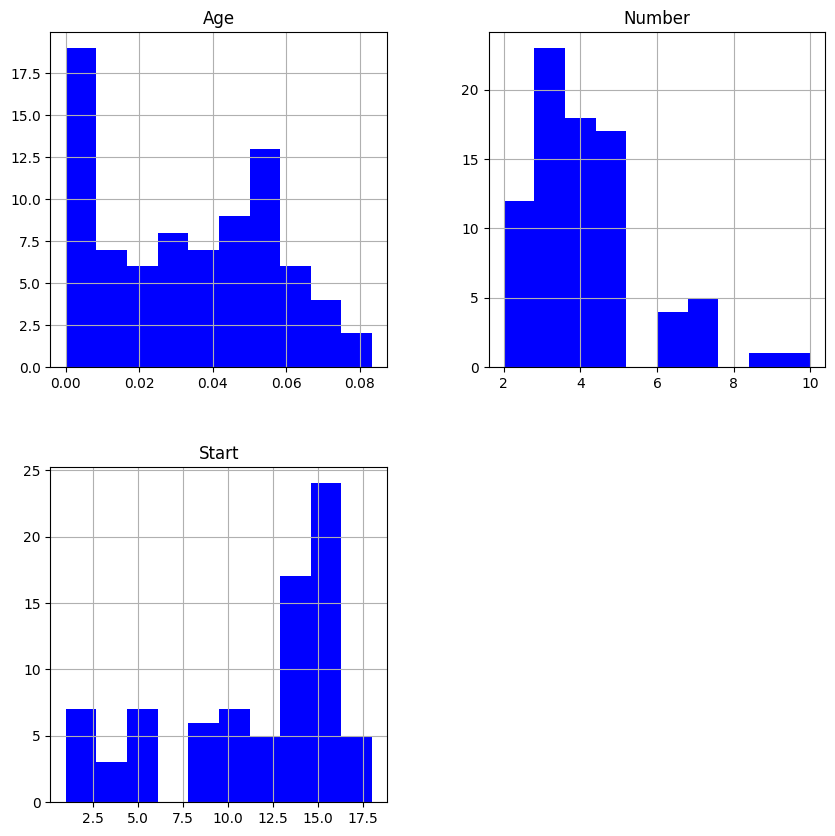

In [ ]:
k_df.hist(bins = 10, figsize = (10,10), color = 'b');

<Axes: xlabel='Kyphosis', ylabel='count'>

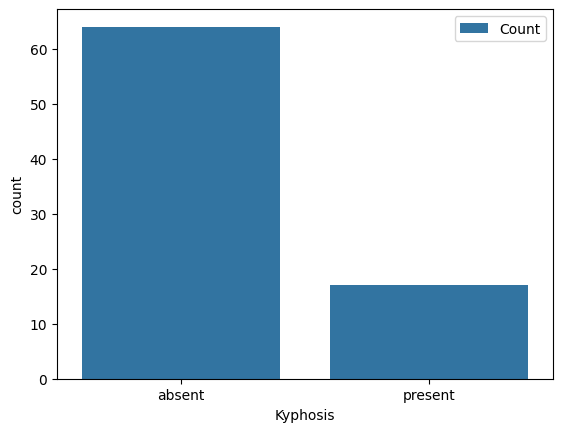

In [ ]:
sns.countplot(x = 'Kyphosis', data = k_df, label = 'Count')

### Heatmap & One Hot Encoding

---

<Axes: >

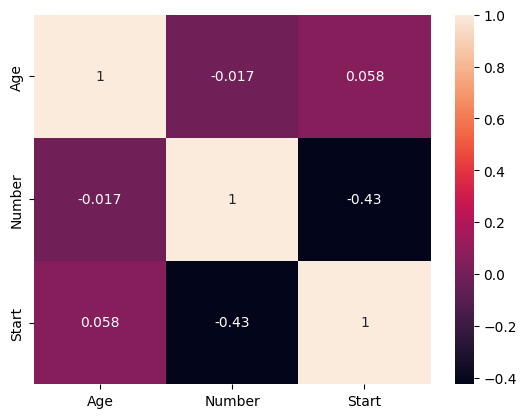

In [ ]:
sns.heatmap(k_df.drop('Kyphosis', axis=1).corr(), annot=True)
# Age is independent of the surgical factors in this dataset
# Higher surgeries tend to involve more vertebrae

In [ ]:
# one hot encoding to ['Kyphosis'] column
Kyphosis_encoded = pd.get_dummies(k_df['Kyphosis'], dtype=int)
Kyphosis_encoded

,absent,present
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
76,0,1
77,1,0
78,1,0
79,0,1


## Summary

### Analysis Summary & Key Findings

Based on this dataset:

*   **Patients who developed kyphosis after surgery** had an average age of 97.8 months (8.1 years).
*   **Patients without kyphosis after surgery** had an average age of 79.9 months (6.6 years).
    *   **Finding:** Based on this dataset, older patients are more likely to develop kyphosis after surgery compared to younger patients.

*   **Kyphosis cases:** averaged 5.2 vertebrae operated on.
*   **Non-kyphosis cases:** averaged 3.8 vertebrae.
    *   **Finding:** Based on this dataset, surgeries involving a larger number of vertebrae are more likely to develop kyphosis.

*   **Kyphosis cases:** surgeries started around vertebra 7.3 (higher up the spine).
*   **Non-kyphosis cases:** surgeries started around vertebra 12.6 (lower down the spine).
    *   **Finding:** Based on this dataset, surgeries beginning higher on the spine seem to increase the risk of kyphosis.

**Hypothesis:** Patients who undergo spinal surgeries involving more vertebrae and a higher starting vertebral position are more likely to develop kyphosis rather than patients with smaller spinal surgeries starting lower in the spine.

**Important Considerations:**

*   Assuming the dataset accurately records the patient ages, number of vertebrae, and surgery start position.
*   This dataset only focuses on 4 categories, leaving out other factors such as surgeon experience & skill, patient health before & after surgery, patient genetics, etc.